In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
universal_img = np.squeeze(np.load('data/universal.npy'))
universal_img.shape

(224, 224, 3)

In [3]:
means = np.mean(universal_img, (0,1))
means

array([-0.12033341,  0.06093451,  0.03050967])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


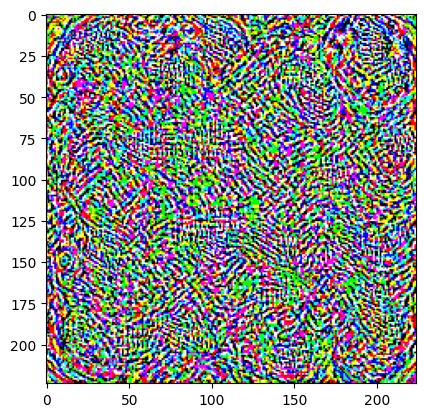

In [4]:
plt.figure()
plt.imshow(universal_img)
plt.show()

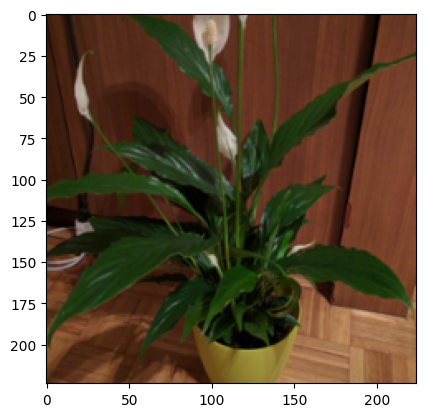

In [7]:
import cv2
from prepare_imagenet_data import undo_image_avg

img_size = (256,256)
crop_size = (224,224)

img = cv2.imread('../python/imgs/test_img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, img_size)

img = img.astype('float32')

img[:, :, 0] -= 123.68
img[:, :, 1] -= 116.779
img[:, :, 2] -= 103.939

if crop_size:
    img = img[(img_size[0] - crop_size[0]) // 2:(img_size[0] + crop_size[0]) // 2, (img_size[1]-crop_size[1])//2:(img_size[1]+crop_size[1])//2, :];

plt.figure()
plt.imshow(
            undo_image_avg(img).astype(dtype="uint8"),
            interpolation=None,
        )
plt.show()

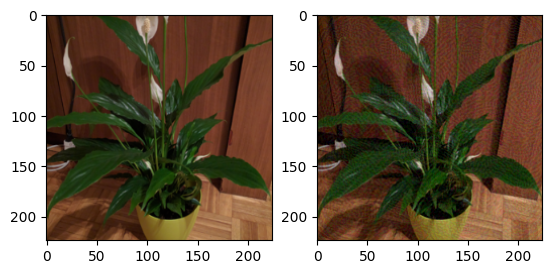

AttributeError: module 'PIL.Image' has no attribute 'save'

In [10]:
from PIL import Image

clipped_pert = np.clip(undo_image_avg(img + universal_img), 0, 255) - np.clip(
    undo_image_avg(img), 0, 255
)
img_with_pert = img + clipped_pert

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(
    undo_image_avg(img).astype(dtype="uint8"),
    interpolation=None,
)
plt.subplot(1, 2, 2)
plt.imshow(
    undo_image_avg(img_with_pert).astype(dtype="uint8"),
    interpolation=None,
)
plt.show()

# Image.save('imgs/pot.png', undo_image_avg(img))
# Image.save('imgs/pot_with_pert.png', undo_image_avg(img_with_pert))

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(
    universal_img.astype(dtype="uint8"),
    interpolation=None,
)
plt.subplot(1, 2, 2)
plt.imshow(
    clipped_pert.astype(dtype="uint8"),
    interpolation=None,
)
plt.show()